# Homework 1

## Q1

For this question, you are going to use [World Bank's Climate Change Knowledge Portal](https://climateknowledgeportal.worldbank.org/).

The Mediterranean Sea is bordered by following 22 countries: Spain, France, Monaco, Italy, Slovenia, Croatia, Bosnia and Herzegovina, Montenegro, Albania, Greece, Turkey, Syria, Lebanon, Israel, Palestine, Egypt, Libya, Tunisia, Algeria, Morocco, Malta, and Cyprus. Using the World Bank's Climate Change Knowledge Portal, obtain the following data through their API:

- Monthly average surface temperatures
- Monthly average precipitation

Gather this information as a time series from 1950 to 2020 for all countries surrounding the Mediterranean Sea. Conduct the following analyses on the retrieved data:

1. Compute the average surface temperature per month for each country, save the results in a pandas data frame called `MAST`, and display the data using a line plot.
2. Compute the average precipitation per month for each country, save the results in a pandas data frame called `MAPR`, and display the data using a line plot.
3. Compute the average surface temperature per annum for each country, save the results in a pandas data frame called `YAST`, and display the data using a line plot.
4. Compute the average precipitation per annum for each country, save the results in a pandas data frame called `YAPR`, and display the data using a line plot.

## Q1.1

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from urllib.request import urlopen
import requests
import datetime
import yfinance as yf

<Axes: xlabel='DATE'>

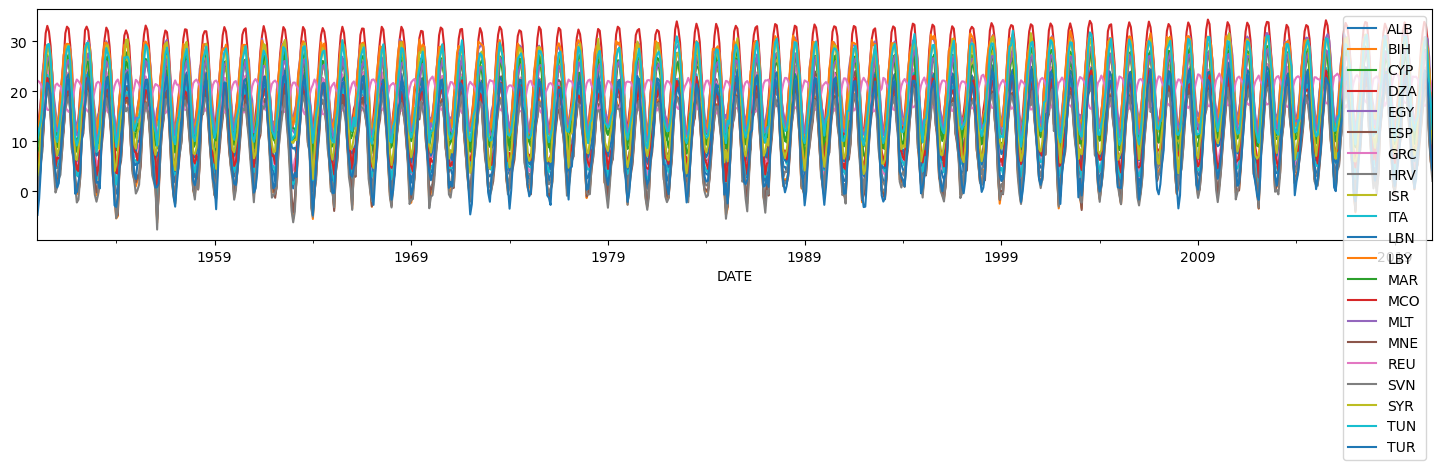

In [2]:
url = 'https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tas_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/ESP,REU,MCO,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,EGY,LBY,TUN,DZA,MAR,MLT,CYP?_format=json'

def d_frame(url):
    json_url = urlopen(url)
    df = json.loads(json_url.read())    
    df=pd.DataFrame(df['data'])
    df.dropna()
    df['DATE'] = pd.to_datetime(df.index)
    df.index=df['DATE']
    df=df.drop(['DATE'],axis=1)
    df=df.query("DATE>='1950-01-01' and DATE<='2020-12-31'")
    return df
MAST=d_frame(url)
MAST.plot(figsize=(18,3))

## Q1.2

<Axes: xlabel='DATE'>

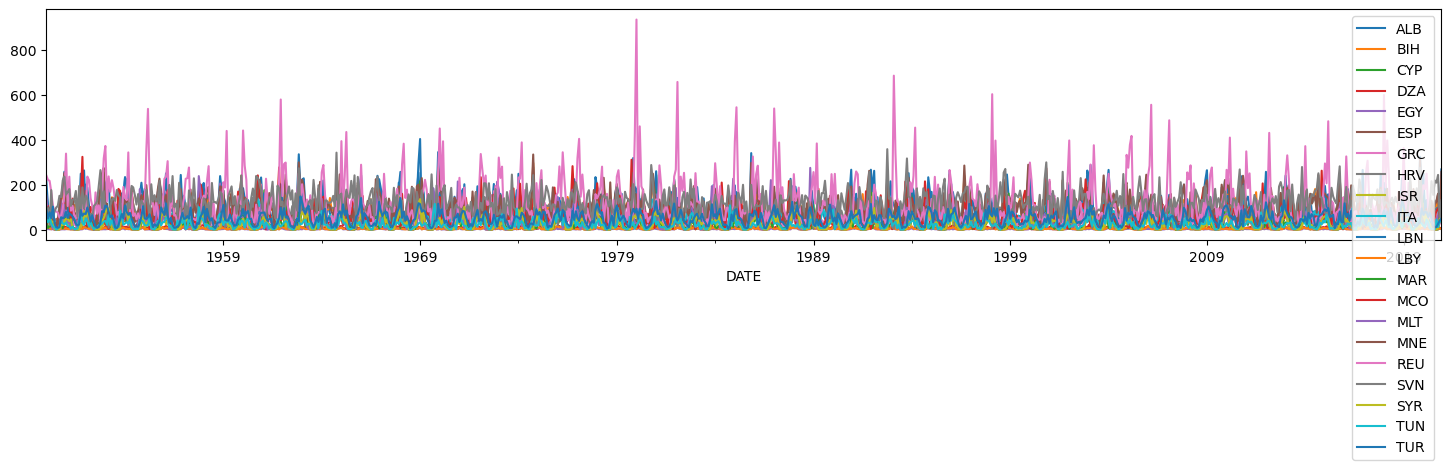

In [3]:
url_2='https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_pr_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/ESP,REU,MCO,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,EGY,LBY,TUN,DZA,MAR,MLT,CYP?_format=json'
MAPR=d_frame(url_2)
MAPR.plot(figsize=(18,3))

## Q1.3

<Axes: xlabel='Date'>

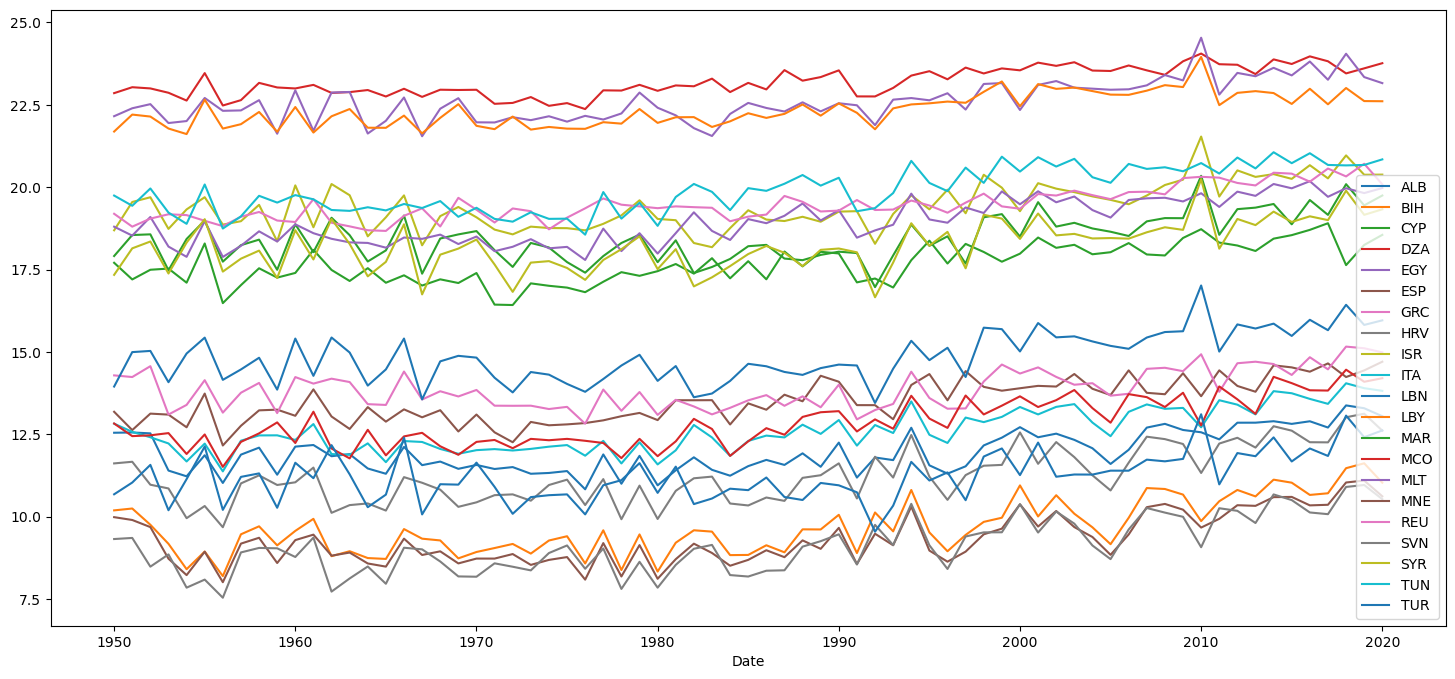

In [4]:
MAST['Date']= MAST.index
MAST['Date']=pd.to_datetime(MAST['Date'])
MAST['Date']=MAST['Date'].dt.year
YAST= MAST.groupby('Date').mean()
YAST.plot(figsize=(18,8))


## Q1.4

<Axes: xlabel='Date'>

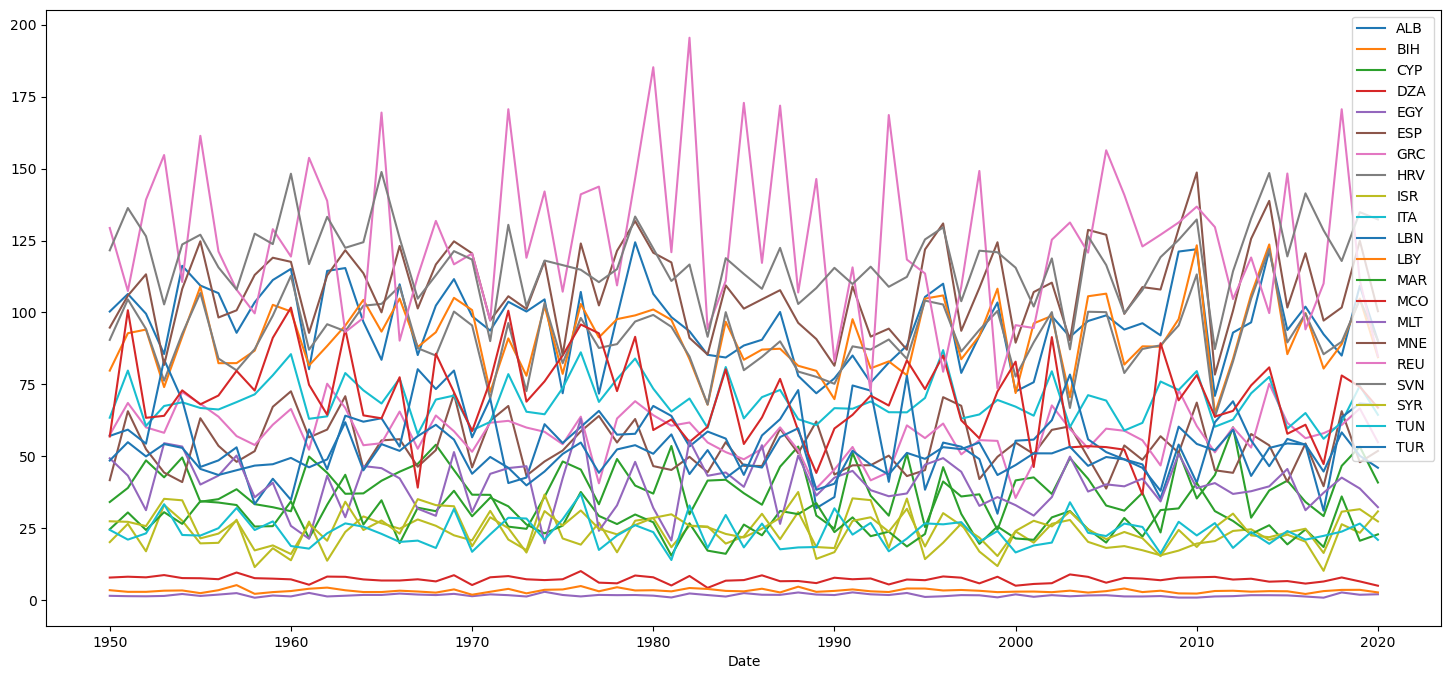

In [5]:
MAPR['Date']= MAPR.index
MAPR['Date']=pd.to_datetime(MAPR['Date'])
MAPR['Date']=MAPR['Date'].dt.year
YAPR= MAPR.groupby('Date').mean()
YAPR.plot(figsize=(18,8))

## Q2

For this question, you are going to use [yfinance](https://pypi.org/project/yfinance/) library to access [Yahoo! Finance Data](https://finance.yahoo.com/).

Using the `yfinance` library, obtain the stock prices of the following companies between January 1st, 2019 and December 31st, 2022: Alphabet (Google), Meta (Facebook), Cisco, Intel, AMD, Qualcomm, Apple, Samsung, Xiaomi, and Tesla.

1. Construct a pandas data frame `CHANGE` containing values of $-1$, $0$, or $1$ for each trading day within the specified time frame for each mentioned company. Assign a value of $0$ if the daily closing price change is within $\pm 2.5\%$ of the opening price. If the change is greater than $2.5\%$ of the opening price, assign a value of $1$. If the change is less than $-2.5\%$, assign a value of $-1$.
2. Identify the longest continuous time intervals during which the `CHANGE` consistently remains $1$ and $-1$ for each company.
3. Create another pandas data frame `DIFFERENCE` consisting of values $-1$, $0$, or $1$ for each day within the specified time period (excluding January 1st, 2019). If the opening price of a day is within $\pm 2.5\%$ of the previous day's opening price, assign a value of $0$. If the change in the opening price in comparison to the previous day is greater than $2.5\%$, assign a value of $1$. If the change in the opening price is less than $-2.5\%$, assign a value of $-1$.
4. Determine the longest continuous time intervals during which the `DIFFERENCE` consistently remains $1$ and $-1$ for each company.

## Q2.1

In [6]:
start_date = '2019-01-01'
end_date = '2022-12-31'
tickers_list = ['GOOG', 'META','CSCO','INTC','AMD','QCOM','AAPL','005930.KS','1810.HK','TSLA']
data = yf.download(tickers_list, start_date, end_date)
data["Date"] = data.index
data = data[["Date","Close","Open"]]
data=data.dropna()
CHANGE=(data['Close']-data['Open'])/data['Open']

def sifir_eksi_arti_1(df):
    for i in df.columns:
        for j in df.index:
            if df[i][j]>0.025:
                df[i][j]=1
            elif df[i][j]<-0.025:
                df[i][j]=-1
            else:
                df[i][j]=0
    return df

CHANGE=sifir_eksi_arti_1(CHANGE)
CHANGE=CHANGE.astype(int)

CHANGE['DATE']=CHANGE.index
CHANGE['DATE']=pd.to_datetime(CHANGE['DATE'],format="%Y-%m-%d")
CHANGE


[*********************100%%**********************]  10 of 10 completed


,005930.KS,1810.HK,AAPL,AMD,CSCO,GOOG,INTC,META,QCOM,TSLA,DATE
Date,,,,,,,,,,,
2019-01-02,0,-1,0,1,0,1,0,1,0,0,2019-01-02
2019-01-03,0,-1,0,-1,-1,0,-1,0,0,0,2019-01-03
2019-01-04,0,1,1,1,1,1,1,1,0,1,2019-01-04
2019-01-07,0,-1,0,1,0,0,0,0,0,1,2019-01-07
2019-01-08,0,-1,0,0,0,0,0,0,0,0,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21,0,0,0,1,0,0,0,1,0,0,2022-12-21
2022-12-22,0,0,0,-1,0,0,0,0,0,-1,2022-12-22
2022-12-23,0,0,0,0,0,0,0,0,0,-1,2022-12-23


## Q2.2

Aşağıda yazılan fonksiyon bir kolonda verilen bir değerin en çok kaç kere ardışık olarak tekrar ettiğini ve bu ardışık tekrarın hangi indeksler arasında olduğunu verir.

In [7]:
def max_ardisik_ve_index(column,target_value):

        max_ardisik = 0
        anlik_ardisik = 0
        start_index = 0
        max_start_index = 0

        for idx, value in enumerate(column):
            if value == target_value:
                anlik_ardisik += 1
                if anlik_ardisik == 1:
                    start_index = idx
                if anlik_ardisik > max_ardisik:
                    max_ardisik = anlik_ardisik
                    max_start_index = start_index
            else:
                anlik_ardisik = 0

        if max_ardisik == 0:
            return f"'{target_value}' değeri ardışık olarak bulunamadı."
        
        max_end_index = max_start_index + max_ardisik - 1
   
        return target_value,max_ardisik,max_start_index,max_end_index 

In [9]:
aranan_değer =[1,-1]
for aranan in aranan_değer:
    dataframe_ardisik_tekrar = {col: max_ardisik_ve_index(CHANGE[col],aranan) for col in CHANGE.columns[0:10]}

    for col, (value, count, start_index, end_index) in dataframe_ardisik_tekrar.items():
        print(f"Şirket:{col} \tTekrar eden değer = {value}, Tekrar Sayısı = {count}, Zaman Aralığı = {CHANGE.index[start_index]}-{CHANGE.index[end_index]}")
    print('\n')


Şirket:005930.KS 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2020-02-03 00:00:00-2020-02-04 00:00:00
Şirket:1810.HK 	Tekrar eden değer = 1, Tekrar Sayısı = 3, Zaman Aralığı = 2020-08-26 00:00:00-2020-08-28 00:00:00
Şirket:AAPL 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2020-02-28 00:00:00-2020-03-02 00:00:00
Şirket:AMD 	Tekrar eden değer = 1, Tekrar Sayısı = 6, Zaman Aralığı = 2021-07-28 00:00:00-2021-08-04 00:00:00
Şirket:CSCO 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2020-02-28 00:00:00-2020-03-02 00:00:00
Şirket:GOOG 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2020-02-28 00:00:00-2020-03-02 00:00:00
Şirket:INTC 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2022-11-10 00:00:00-2022-11-11 00:00:00
Şirket:META 	Tekrar eden değer = 1, Tekrar Sayısı = 3, Zaman Aralığı = 2022-03-16 00:00:00-2022-03-18 00:00:00
Şirket:QCOM 	Tekrar eden değer = 1, Tekrar Sayısı = 5, Zaman Aralığı = 2022-05-25 00:00:00-2022-06-02 00:

## Q2.3

In [10]:
veri_1 = yf.download(tickers_list, start_date, end_date)
veri_2=yf.download(tickers_list, start_date, end_date)
veri_1['Date']=veri_1.index
veri_2['Date']=veri_2.index
veri_1 = veri_1[["Date","Open"]]
veri_2 = veri_2[["Date","Open"]]
veri_1=veri_1.dropna()
veri_2=veri_2.dropna()

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed


Aşağıda veri_1 dataframe'inin sonuna ve veri_2 dataframe'inin başına 0'lardan oluşan yeni satır ekledim.

In [11]:
new_row = pd.DataFrame({col: [0] for col in veri_1.columns}, index=[925])
veri_1 = pd.concat([veri_1,new_row]).reset_index(drop=True)
new_row = pd.DataFrame({col: [0] for col in veri_2.columns}, index=[0])
veri_2 = pd.concat([new_row, veri_2]).reset_index(drop=True)

In [12]:
veri_1

Date      Open                                            \
                         005930.KS 1810.HK        AAPL        AMD       CSCO   
0    2019-01-02 00:00:00   39400.0   12.98   38.722500  18.010000  42.279999   
1    2019-01-03 00:00:00   38300.0   12.28   35.994999  18.420000  42.299999   
2    2019-01-04 00:00:00   37450.0   11.66   36.132500  17.549999  41.849998   
3    2019-01-07 00:00:00   38000.0   12.32   37.174999  19.440001  42.860001   
4    2019-01-08 00:00:00   38000.0   12.16   37.389999  21.190001  43.570000   
..                   ...       ...     ...         ...        ...        ...   
920  2022-12-22 00:00:00   58100.0   10.78  134.350006  66.080002  47.490002   
921  2022-12-23 00:00:00   58200.0   10.72  130.919998  63.110001  47.250000   
922  2022-12-28 00:00:00   57600.0   11.06  129.669998  62.540001  47.689999   
923  2022-12-29 00:00:00   56000.0   10.96  127.989998  63.639999  47.259998   
924                    0       0.0    0.00    0.000000   0.000000   0.000000   

                                                               
          GOOG       INTC        META        QCOM        TSLA  
0    50.828499  45.959999  128.990005   56.200001   20.406668  
1    52.049999  46.150002  134.690002   55.950001   20.466667  
2    51.629501  45.840000  134.009995   56.500000   20.400000  
3    53.575001  47.099998  137.559998   56.389999   21.448000  
4    53.805500  47.799999  139.889999   56.709999   22.797333  
..         ...        ...         ...         ...         ...  
920  88.930000  26.450001  117.199997  112.570000  136.000000  
921  87.620003  25.920000  116.029999  109.699997  126.370003  
922  87.500000  25.840000  116.250000  108.870003  110.349998  
923  87.029999  25.770000  116.400002  108.349998  120.389999  
924   0.000000   0.000000    0.000000    0.000000    0.000000  

[925 rows x 11 columns]

In [13]:
veri_2

Date      Open                                            \
                         005930.KS 1810.HK        AAPL        AMD       CSCO   
0                      0       0.0    0.00    0.000000   0.000000   0.000000   
1    2019-01-02 00:00:00   39400.0   12.98   38.722500  18.010000  42.279999   
2    2019-01-03 00:00:00   38300.0   12.28   35.994999  18.420000  42.299999   
3    2019-01-04 00:00:00   37450.0   11.66   36.132500  17.549999  41.849998   
4    2019-01-07 00:00:00   38000.0   12.32   37.174999  19.440001  42.860001   
..                   ...       ...     ...         ...        ...        ...   
920  2022-12-21 00:00:00   58700.0   10.58  132.979996  65.430000  47.689999   
921  2022-12-22 00:00:00   58100.0   10.78  134.350006  66.080002  47.490002   
922  2022-12-23 00:00:00   58200.0   10.72  130.919998  63.110001  47.250000   
923  2022-12-28 00:00:00   57600.0   11.06  129.669998  62.540001  47.689999   
924  2022-12-29 00:00:00   56000.0   10.96  127.989998  63.639999  47.259998   

                                                               
          GOOG       INTC        META        QCOM        TSLA  
0     0.000000   0.000000    0.000000    0.000000    0.000000  
1    50.828499  45.959999  128.990005   56.200001   20.406668  
2    52.049999  46.150002  134.690002   55.950001   20.466667  
3    51.629501  45.840000  134.009995   56.500000   20.400000  
4    53.575001  47.099998  137.559998   56.389999   21.448000  
..         ...        ...         ...         ...         ...  
920  89.730003  26.590000  116.699997  112.760002  139.339996  
921  88.930000  26.450001  117.199997  112.570000  136.000000  
922  87.620003  25.920000  116.029999  109.699997  126.370003  
923  87.500000  25.840000  116.250000  108.870003  110.349998  
924  87.029999  25.770000  116.400002  108.349998  120.389999  

[925 rows x 11 columns]

In [14]:
DIFFERENCE=(veri_1['Open']-veri_2['Open'])/veri_2['Open']
DIFFERENCE=sifir_eksi_arti_1(DIFFERENCE)
DIFFERENCE.index=veri_1['Date']
DIFFERENCE=DIFFERENCE.astype(int)
DIFFERENCE=DIFFERENCE[1:924]
DIFFERENCE

,005930.KS,1810.HK,AAPL,AMD,CSCO,GOOG,INTC,META,QCOM,TSLA
Date,,,,,,,,,,
2019-01-03,-1,-1,-1,0,0,0,0,1,0,0
2019-01-04,0,-1,0,-1,0,0,0,0,0,0
2019-01-07,0,1,1,1,0,1,1,1,0,1
2019-01-08,0,0,0,1,0,0,0,0,0,1
2019-01-09,0,-1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-12-21,0,0,0,1,0,0,0,1,0,-1
2022-12-22,0,0,0,0,0,0,0,0,0,0
2022-12-23,0,0,-1,-1,0,0,0,0,-1,-1


## Q2.4

In [15]:
for aranan in aranan_değer:
    dataframe_ardisik_tekrar_2 = {col: max_ardisik_ve_index(DIFFERENCE[col],aranan) for col in DIFFERENCE.columns[0:10]}

    for col, (value, count, start_index, end_index) in dataframe_ardisik_tekrar_2.items():
        print(f"Şirket:{col} \tTekrar eden değer = {value}, Tekrar Sayısı = {count}, Zaman Aralığı = {DIFFERENCE.index[start_index]}-{DIFFERENCE.index[end_index]}")
    print('\n')

Şirket:005930.KS 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2019-01-24 00:00:00-2019-01-25 00:00:00
Şirket:1810.HK 	Tekrar eden değer = 1, Tekrar Sayısı = 3, Zaman Aralığı = 2020-08-18 00:00:00-2020-08-20 00:00:00
Şirket:AAPL 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2019-03-11 00:00:00-2019-03-12 00:00:00
Şirket:AMD 	Tekrar eden değer = 1, Tekrar Sayısı = 4, Zaman Aralığı = 2022-11-10 00:00:00-2022-11-15 00:00:00
Şirket:CSCO 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2019-05-16 00:00:00-2019-05-17 00:00:00
Şirket:GOOG 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2020-03-02 00:00:00-2020-03-03 00:00:00
Şirket:INTC 	Tekrar eden değer = 1, Tekrar Sayısı = 3, Zaman Aralığı = 2020-04-03 00:00:00-2020-04-07 00:00:00
Şirket:META 	Tekrar eden değer = 1, Tekrar Sayısı = 3, Zaman Aralığı = 2021-04-01 00:00:00-2021-04-08 00:00:00
Şirket:QCOM 	Tekrar eden değer = 1, Tekrar Sayısı = 2, Zaman Aralığı = 2019-04-23 00:00:00-2019-04-24 00: